In [27]:
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBRFClassifier

In [28]:
df = pd.read_csv('sample_processed.csv')
df.head()

,CLIENT_ID,TARGET,total_visits_domain,n1_active_days_domain,n2_active_days_domain,n3_active_days_domain,average_visits_per_day_domain,visits_1_day_ago_domain,visits_2_day_ago_domain,visits_3_day_ago_domain
0,u_1,0,1,0,0,0,NaN,0,0,1
1,u_2,0,5,2,1,0,2.5,2,0,0
2,u_3,0,3,1,0,0,2.0,0,2,0
3,u_4,0,13,2,1,1,5.0,0,1,0
4,u_5,0,1,0,0,0,NaN,0,0,0


In [29]:
df.corr()

,TARGET,total_visits_domain,n1_active_days_domain,n2_active_days_domain,n3_active_days_domain,average_visits_per_day_domain,visits_1_day_ago_domain,visits_2_day_ago_domain,visits_3_day_ago_domain
TARGET,1.000000,-0.014827,-0.021227,-0.017718,-0.017014,0.005642,-0.006802,0.040554,-0.024247
total_visits_domain,-0.014827,1.000000,0.861424,0.862826,0.837921,0.486361,0.491758,0.338130,0.316803
n1_active_days_domain,-0.021227,0.861424,1.000000,0.795448,0.683506,0.046781,0.406348,0.272830,0.252466
n2_active_days_domain,-0.017718,0.862826,0.795448,1.000000,0.851031,0.403410,0.422085,0.297669,0.273187
n3_active_days_domain,-0.017014,0.837921,0.683506,0.851031,1.000000,0.524340,0.441018,0.288884,0.232643
average_visits_per_day_domain,0.005642,0.486361,0.046781,0.403410,0.524340,1.000000,0.259239,0.177420,0.116665
visits_1_day_ago_domain,-0.006802,0.491758,0.406348,0.422085,0.441018,0.259239,1.000000,0.038736,-0.017881
visits_2_day_ago_domain,0.040554,0.338130,0.272830,0.297669,0.288884,0.177420,0.038736,1.000000,0.077436
visits_3_day_ago_domain,-0.024247,0.316803,0.252466,0.273187,0.232643,0.116665,-0.017881,0.077436,1.000000


In [30]:
print('df shape: ', df.shape)
df.isna().sum().sort_values(ascending=False)[:5]

df shape:  (2905, 10)


average_visits_per_day_domain    1244
CLIENT_ID                           0
TARGET                              0
total_visits_domain                 0
n1_active_days_domain               0
dtype: int64

Только в одном столбце много НаНов. Причем это столбец по среднему числу визитов. Непонятно, чем его заполнять, заполним 0, чтобы отличать таких пользователей (все остальные значения в этом столбце больше 0).

In [31]:
df.average_visits_per_day_domain.fillna(0, inplace=True)

#### Train-Test-Split

In [32]:
X = df.drop(['CLIENT_ID', 'TARGET'], axis=1).values
y = df.TARGET.values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [34]:
print(X_train.shape, X_test.shape)
print(Counter(y_train))
print(Counter(y_test))

(2033, 8) (872, 8)
Counter({0: 1994, 1: 39})
Counter({0: 855, 1: 17})


#### Очень маленький процент Target=1 

********************
Logistic Regression
********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       855
           1       1.00      0.00      0.00        17

    accuracy                           0.98       872
   macro avg       0.99      0.50      0.50       872
weighted avg       0.98      0.98      0.97       872



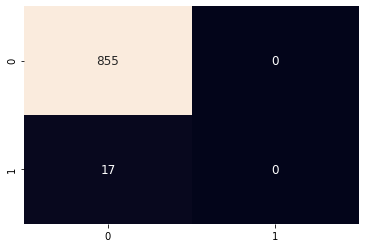

In [35]:
model_LR = LogisticRegression().fit(X_train, y_train)
preds_LR = model_LR.predict(X_test)
prob_preds_LR = model_LR.predict_proba(X_test)[::,1]

print('*'*20)
print("Logistic Regression")
print('*'*20)
print(classification_report(y_test, preds_LR,zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_LR), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

********************
Random Forest
********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       855
           1       0.00      0.00      0.00        17

    accuracy                           0.98       872
   macro avg       0.49      0.50      0.49       872
weighted avg       0.96      0.98      0.97       872



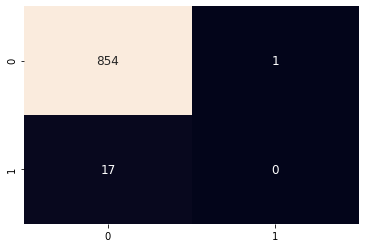

In [36]:
model_RF = RandomForestClassifier().fit(X_train, y_train)
preds_RF = model_RF.predict(X_test)
prob_preds_RF = model_RF.predict_proba(X_test)[::,1]

print('*'*20)
print("Random Forest")
print('*'*20)
print(classification_report(y_test, preds_RF, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_RF), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

********************
Balanced Random Forest
********************
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       855
           1       0.00      0.00      0.00        17

    accuracy                           0.98       872
   macro avg       0.49      0.50      0.49       872
weighted avg       0.96      0.98      0.97       872



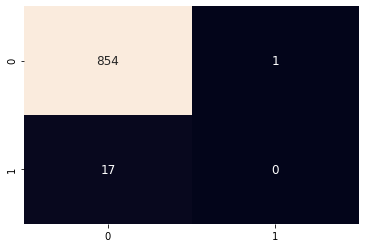

In [37]:
model_BRF = BalancedRandomForestClassifier().fit(X_train, y_train)
preds_BRF = model_RF.predict(X_test)
prob_preds_BRF = model_BRF.predict_proba(X_test)[::,1]

print('*'*20)
print("Balanced Random Forest")
print('*'*20)
print(classification_report(y_test, preds_BRF, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_BRF), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

In [38]:
1 / y_train.mean()

52.128205128205124

[13:06:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
********************
Random Forest
********************
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       855
           1       0.03      0.53      0.05        17

    accuracy                           0.62       872
   macro avg       0.51      0.58      0.41       872
weighted avg       0.97      0.62      0.75       872



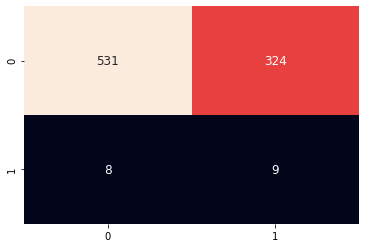

In [39]:
model_XGB = XGBRFClassifier(scale_pos_weight=50, use_label_encoder=False).fit(X_train, y_train)
preds_XGB = model_XGB.predict(X_test)
prob_preds_XGB = model_XGB.predict_proba(X_test)[::,1]

print('*'*20)
print("Random Forest")
print('*'*20)
print(classification_report(y_test, preds_XGB, zero_division=1))
sns.heatmap(confusion_matrix(y_test, preds_XGB), annot=True, annot_kws={"size": 12}, fmt='g', cbar=False);

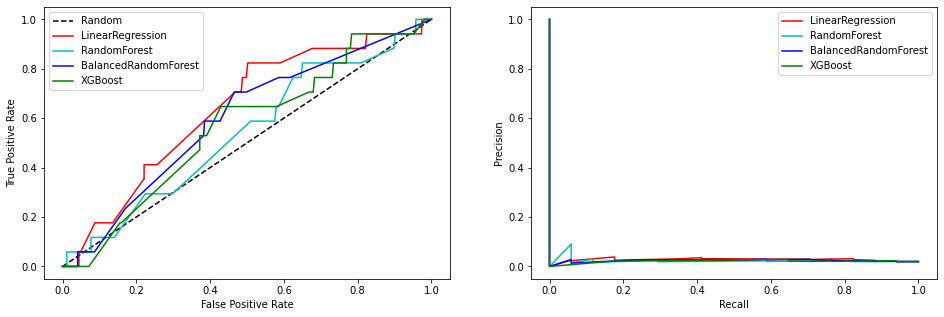

In [40]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))

models = ['LinearRegression', 'RandomForest', 'BalancedRandomForest', 'XGBoost']
preds = [prob_preds_LR, prob_preds_BRF, prob_preds_RF, prob_preds_XGB]
colors = 'rcbg'

ax[0].plot([0, 1], [0, 1], ls='--', label='Random', c='k')

for model, pred, c in zip(models, preds, colors):
    fpr, tpr, _ = roc_curve(y_test, pred)
    ax[0].plot(fpr, tpr, label=model, c=c)
    
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    ax[1].plot(recall, precision, label=model, c=c)


ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

ax[0].legend()
ax[1].legend()